# Atividade 2 - Meteorologia
## Controle da Poluição Atmosférica I
## Alice Alegria Ramos e Ana Carolina Carvalho

## Parte 1: Analise da condição meteorológica de superfície (estação meteorológica)

## Empreendiemnto: Klabin - Unidade Otacílio Costa 


Ao procurar os dados de Superfície e Sondagem, a unidade de Otacílio Costa não foi localizada. Encontramos dados de Joinville e Florianópolis, municípios proximos a unidade em questão. Para esta analise, foram utilizados os dados do Município de Florianópolis como base.

In [7]:
import pandas as pd
import os

# Definir o diretório onde estão os arquivos
diretorio = r'C:\Users\Ana Carolina\Documents\GitHub\ENS410064\Atv 2'

# Listar os arquivos no diretório
arquivos = os.listdir(diretorio)

# Abrir cada arquivo dentro da pasta e acumular em uma lista chamada de MetSup
MetSup = []

for arquivo in arquivos:
    if arquivo.endswith('.csv'):
        # Caminho completo para o arquivo
        caminho_arquivo = os.path.join(diretorio, arquivo)
        
        # Carregar o arquivo CSV para um DataFrame e adicionar à lista MetSup
        df = pd.read_csv(caminho_arquivo)
        MetSup.append(df)

# Converter MetSup para um único DataFrame chamado MetSup
MetSup = pd.concat(MetSup, ignore_index=True)

# Exibir o DataFrame MetSup
print(MetSup)

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [2]:
import pandas as pd

# Criar uma coluna de datetime utilizando as colunas de ano, mês, dia e hora
MetSup['datetime'] = pd.to_datetime(MetSup[['year', 'month', 'day', 'hour']])

# Exibir as datas criadas em Datetime
print("Datas criadas em Datetime:")
print(MetSup['datetime'])

# Definir a coluna de datetime como índice do DataFrame
MetSup.set_index('datetime', inplace=True)

# Exibir as primeiras linhas do DataFrame para verificar se a coluna de datetime foi criada corretamente
print("\nDataFrame 'MetSup' com datetime como índice:")
print(MetSup.head())

Datas criadas em Datetime:
0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]

DataFrame 'MetSup' com datetime como índice:
                     day  month  year  hour  ct     wd        ws      hc  ccp  \
datetime                                                                        
2023-01-01 00:00:00    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0   
2023-01-01 01:00:00    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 02:00:00    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 03:00:00    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0   
2023-01-01 04:00:00    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0   

          

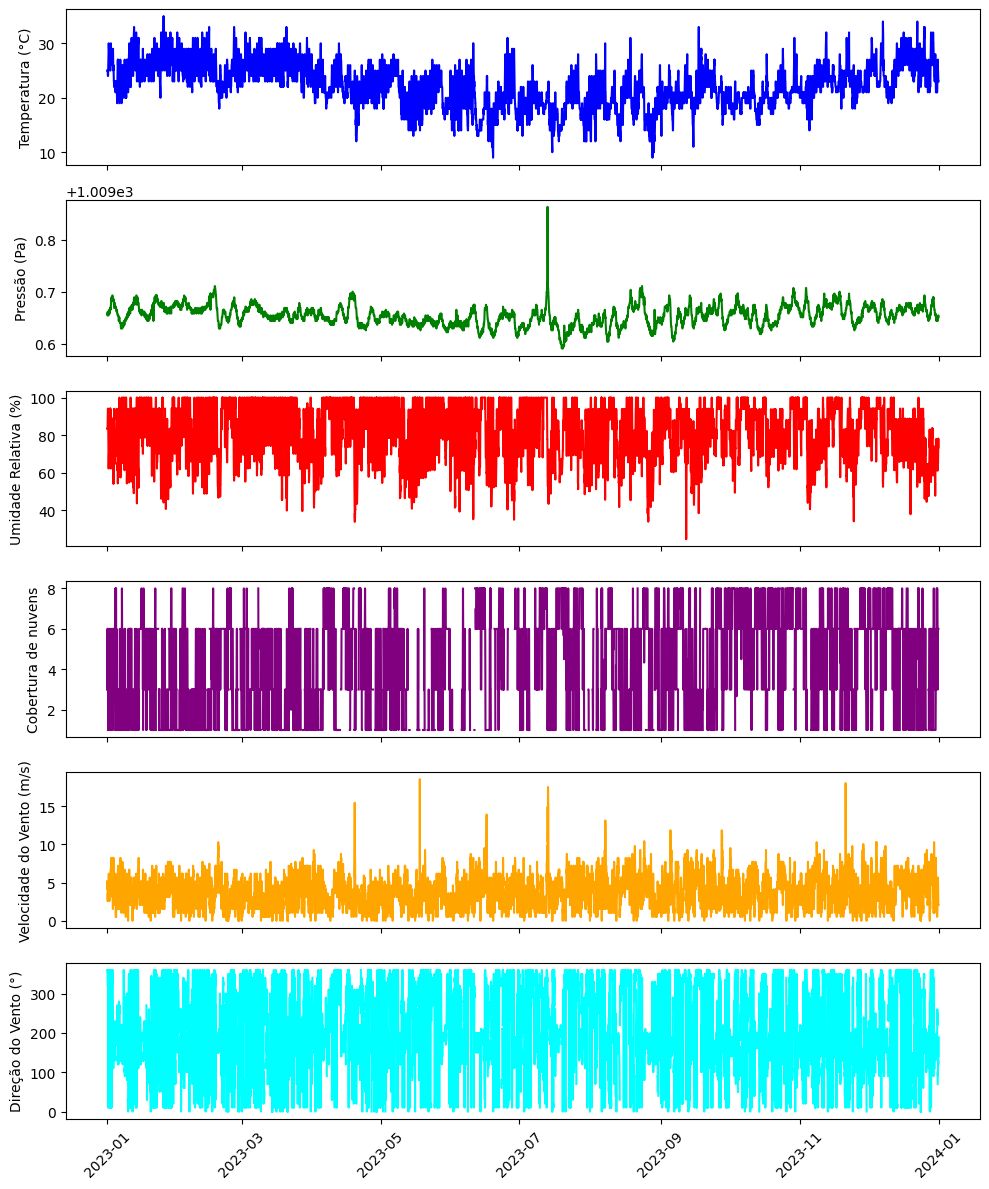

In [3]:
import matplotlib.pyplot as plt
import os

MetSup['datetime'] = pd.to_datetime(MetSup[['year', 'month', 'day', 'hour']])

# Criar figura e subplots
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Definir cores para os gráficos
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Definir rótulos para os eixos y
y_labels = ['Temperatura (°C)', 'Pressão (Pa)', 'Umidade Relativa (%)', 'Cobertura de nuvens', 'Velocidade do Vento (m/s)', 'Direção do Vento (°)']

# Plotar os dados em cada subplot
for i, col in enumerate(['temp', 'p', 'relh', 'cco', 'ws', 'wd']):
    ax[i].plot(MetSup['datetime'], MetSup[col], color=colors[i])
    ax[i].set_ylabel(y_labels[i])
    ax[i].tick_params(axis='x', rotation=45)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

# Salvar a figura como um arquivo PNG
fig_folder = os.path.join(os.getcwd(), 'figures')
os.makedirs(fig_folder, exist_ok=True)  # Criar a pasta 'figures' se não existir
fig_path = os.path.join(fig_folder, 'Figure1.png')
fig.savefig(fig_path)

O percentil 99 da temperatura é: 31.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 do umidade relativa é: 100.0
O percentil 99 da cco é: 8.0
O percentil 99 do ws é: 8.745548
O percentil 99 do wd é: 360.0


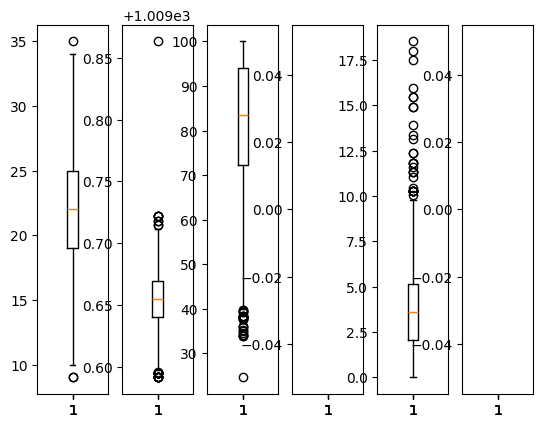

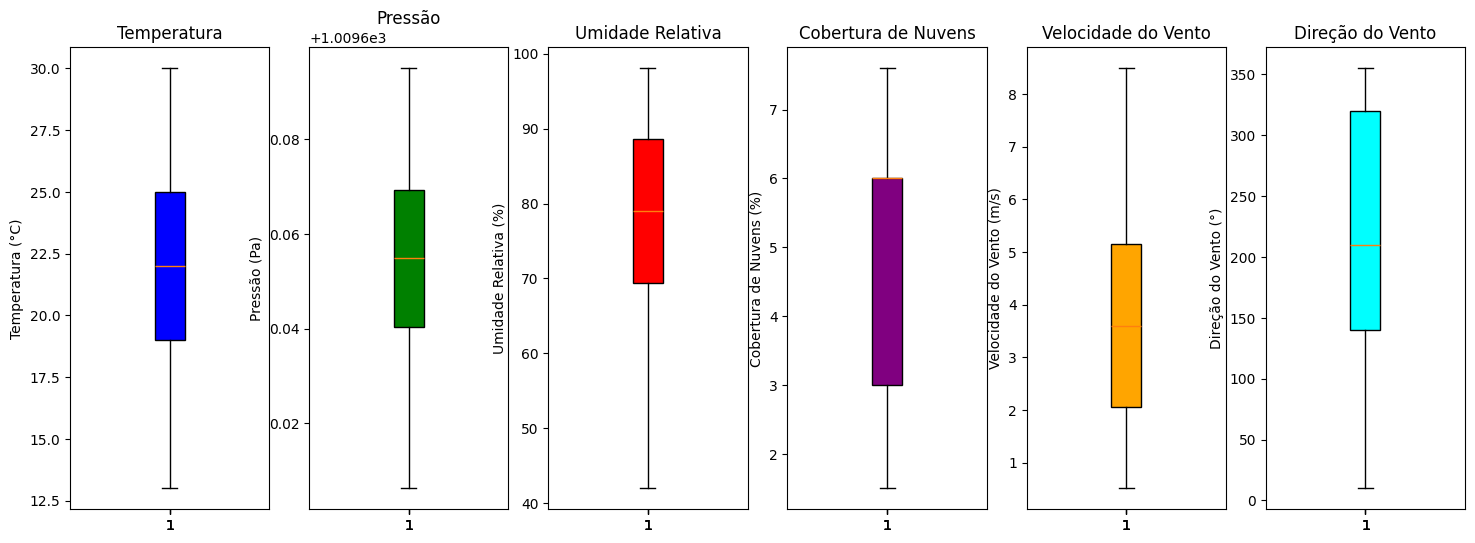

In [8]:
fig,ax = plt.subplots(1,6,sharex=True)
ax[0].boxplot(MetSup['temp'])
ax[1].boxplot(MetSup['p'])
ax[2].boxplot(MetSup['relh'])
ax[3].boxplot(MetSup['cco'])
ax[4].boxplot(MetSup['ws'])
ax[5].boxplot(MetSup['wd'])

import numpy as np
temp99 = np.percentile(MetSup['temp'],99)
print('O percentil 99 da temperatura é: '+str(temp99))
p99 = np.percentile(MetSup['p'],99)
print('O percentil 99 da pressão é: '+str(p99))
relh99 = relh9 = np.percentile(MetSup['relh'],99)
print('O percentil 99 do umidade relativa é: '+str(relh99))
cco99 = np.nanpercentile(MetSup['cco'],99)
print('O percentil 99 da cco é: '+str(cco99))
ws99 = np.percentile(MetSup['ws'],99)
print('O percentil 99 do ws é: '+str(ws99))
wd99 =  np.nanpercentile(MetSup['wd'],99)
print('O percentil 99 do wd é: '+str(wd99))

# Definindo cores para cada boxplot
box_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
fig, ax = plt.subplots(1, 6, sharex=True, figsize=(18, 6))

boxes = [
    ax[0].boxplot(MetSup['temp'][(MetSup['temp'] < temp99) & 
                                        (MetSup['temp'] > np.percentile(MetSup['temp'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[0])),
    ax[1].boxplot(MetSup['p'][(MetSup['p'] < p99) & 
                                     (MetSup['p'] > np.percentile(MetSup['p'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[1])),
    ax[2].boxplot(MetSup['relh'][(MetSup['relh'] < relh99) & 
                                        (MetSup['relh'] > np.percentile(MetSup['relh'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[2])),
    ax[3].boxplot(MetSup['cco'][(MetSup['cco'] < cco99) &
                                       (MetSup['cco'] > np.nanpercentile(MetSup['cco'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[3])),
    ax[4].boxplot(MetSup['ws'][(MetSup['ws'] < ws99) &
                                      (MetSup['ws'] > np.percentile(MetSup['ws'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[4])),
    ax[5].boxplot(MetSup['wd'][(MetSup['wd'] < wd99) &
                                      (MetSup['wd'] > np.nanpercentile(MetSup['wd'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[5]))
]

# Adicionando títulos para cada subplot
ax[0].set_title('Temperatura')
ax[1].set_title('Pressão')
ax[2].set_title('Umidade Relativa')
ax[3].set_title('Cobertura de Nuvens')
ax[4].set_title('Velocidade do Vento')
ax[5].set_title('Direção do Vento')

# Ajustando os rótulos dos eixos
ax[0].set_ylabel('Temperatura (°C)')
ax[1].set_ylabel('Pressão (Pa)')
ax[2].set_ylabel('Umidade Relativa (%)')
ax[3].set_ylabel('Cobertura de Nuvens (%)')
ax[4].set_ylabel('Velocidade do Vento (m/s)')
ax[5].set_ylabel('Direção do Vento (°)')

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure2.png') 

                     day  month  year  hour  ct     wd        ws      hc  ccp  \
datetime                                                                        
2023-01-01 00:00:00    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0   
2023-01-01 01:00:00    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 02:00:00    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 03:00:00    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0   
2023-01-01 04:00:00    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0   
...                  ...    ...   ...   ...  ..    ...       ...     ...  ...   
2023-12-31 19:00:00   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0   
2023-12-31 20:00:00   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0   
2023-12-31 21:00:00   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0   
2023-12-31 22:00:00   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0   
2023-12-31 23:00:00   31    

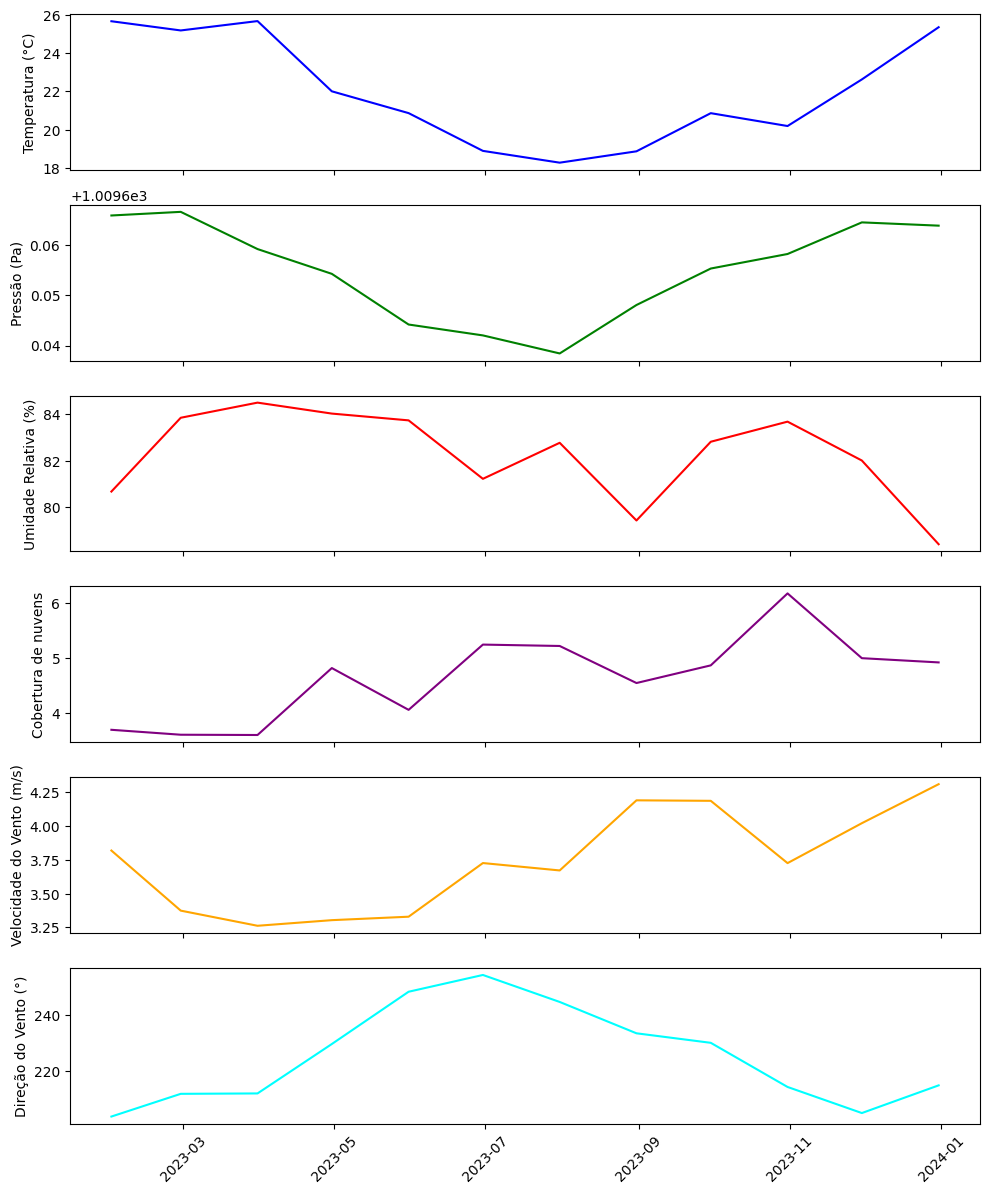

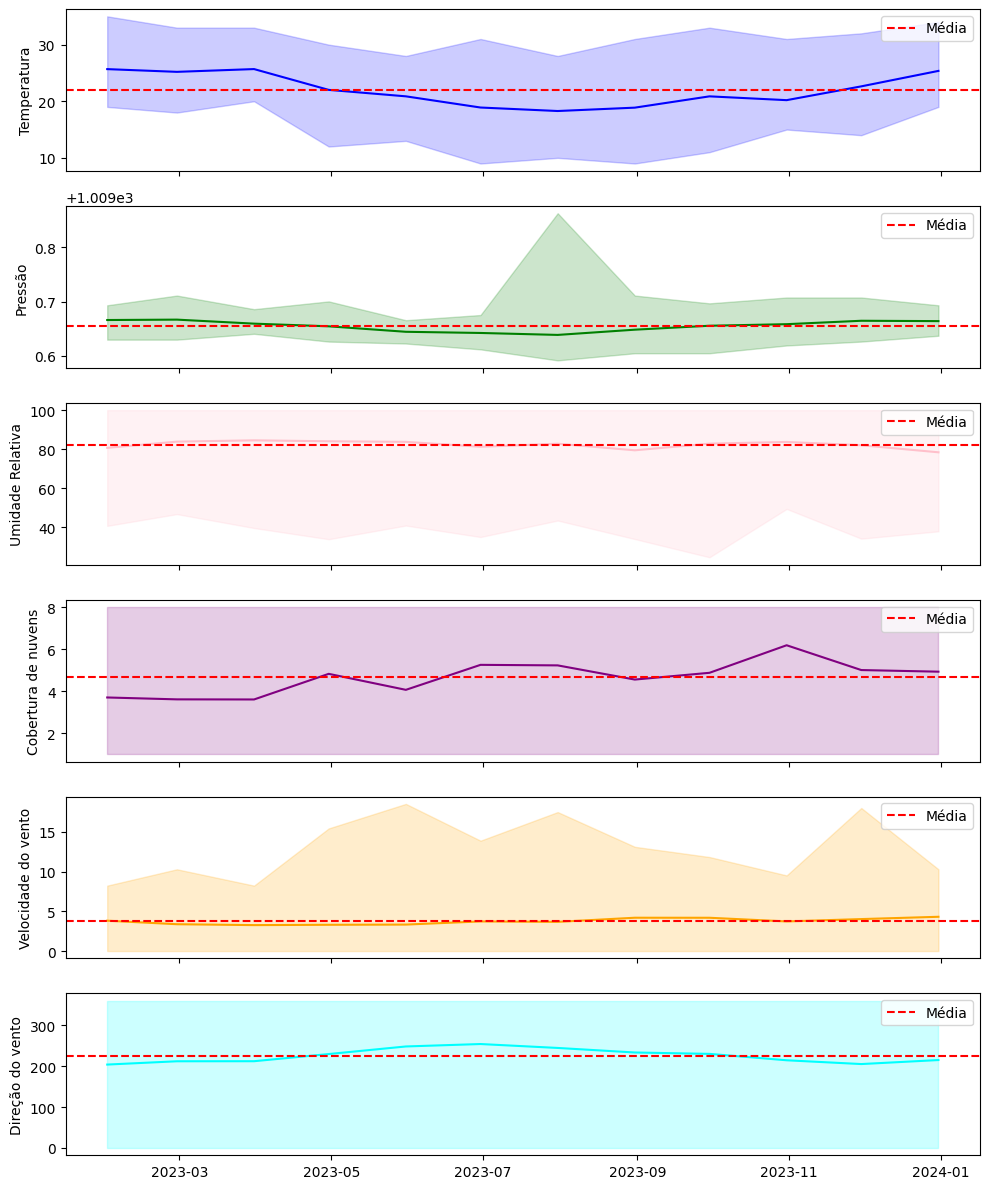

In [12]:
MetSup['datetime'] = pd.to_datetime(MetSup[['year', 'month', 'day', 'hour']])
print(MetSup)

MetSup.set_index('datetime', inplace=True)
media_mensal = MetSup.resample('ME').mean()
min_mensal = MetSup.resample('ME').min()
max_mensal = MetSup.resample('ME').max()

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

ax[0].plot(media_mensal.index, media_mensal['temp'], color='blue')
ax[0].set_ylabel('Temperatura (°C)')

ax[1].plot(media_mensal.index, media_mensal['p'], color='green')
ax[1].set_ylabel('Pressão (Pa)')

ax[2].plot(media_mensal.index, media_mensal['relh'], color='red')
ax[2].set_ylabel('Umidade Relativa (%)')

ax[3].plot(media_mensal.index, media_mensal['cco'], color='purple')
ax[3].set_ylabel('Cobertura de nuvens')

ax[4].plot(media_mensal.index, media_mensal['ws'], color='orange')
ax[4].set_ylabel('Velocidade do Vento (m/s)')

ax[5].plot(media_mensal.index, media_mensal['wd'], color='cyan')
ax[5].set_ylabel('Direção do Vento (°)')

ax[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure3.png') 


fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Plot para a temperatura
ax[0].plot(media_mensal.index, media_mensal['temp'], color='blue')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='blue', alpha=0.2)
ax[0].axhline(y=media_mensal['temp'].mean(), color='red', linestyle='--', label='Média')
ax[0].set_ylabel('Temperatura')
ax[0].legend()

# Plot para a pressão
ax[1].plot(media_mensal.index, media_mensal['p'], color='green')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='green', alpha=0.2)
ax[1].axhline(y=media_mensal['p'].mean(), color='red', linestyle='--', label='Média')
ax[1].set_ylabel('Pressão')
ax[1].legend()

# Plot para a umidade relativa
ax[2].plot(media_mensal.index, media_mensal['relh'], color='pink')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='pink', alpha=0.2)
ax[2].axhline(y=media_mensal['relh'].mean(), color='red', linestyle='--', label='Média')
ax[2].set_ylabel('Umidade Relativa')
ax[2].legend()

# Plot para a cobertura de nuvens
ax[3].plot(media_mensal.index, media_mensal['cco'], color='purple')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='purple', alpha=0.2)
ax[3].axhline(y=media_mensal['cco'].mean(), color='red', linestyle='--', label='Média')
ax[3].tick_params(axis='x', rotation=45)
ax[3].set_ylabel('Cobertura de nuvens')
ax[3].legend()

# Plot para a velocidade do vento
ax[4].plot(media_mensal.index, media_mensal['ws'], color='orange')
ax[4].fill_between(media_mensal.index, min_mensal['ws'], max_mensal['ws'], color='orange', alpha=0.2)
ax[4].axhline(y=media_mensal['ws'].mean(), color='red', linestyle='--', label='Média')
ax[4].set_ylabel('Velocidade do vento')
ax[4].legend()

# Plot para a direção do vento
ax[5].plot(media_mensal.index, media_mensal['wd'], color='cyan')
ax[5].fill_between(media_mensal.index, min_mensal['wd'], max_mensal['wd'], color='cyan', alpha=0.2)
ax[5].axhline(y=media_mensal['wd'].mean(), color='red', linestyle='--', label='Média')
ax[5].set_ylabel('Direção do vento')
ax[5].legend()

plt.tight_layout()
plt.show()

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure4.png') 

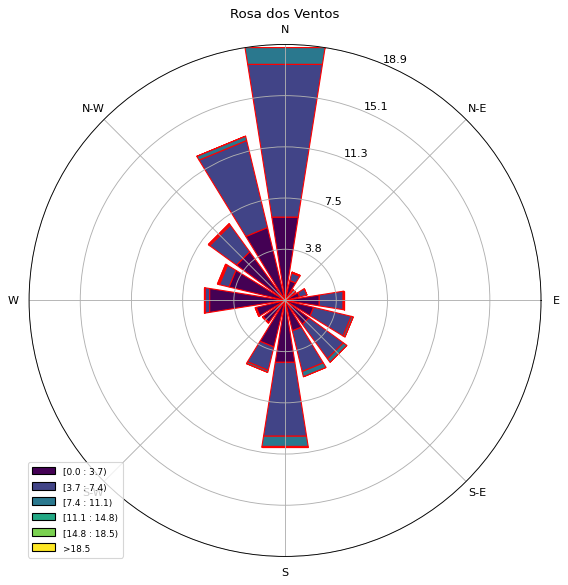

In [13]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Criando a Rosa dos ventos
ax = WindroseAxes.from_ax()
ax.bar(MetSup['wd'], MetSup['ws'], normed=True, opening=0.8, edgecolor="red")
ax.set_legend()

# Adicionando um título
ax.set_title('Rosa dos Ventos')

plt.show()


## Parte 2: Análise do perfil de temperatura

Analisando dados para 2023-10-26 00:00:00


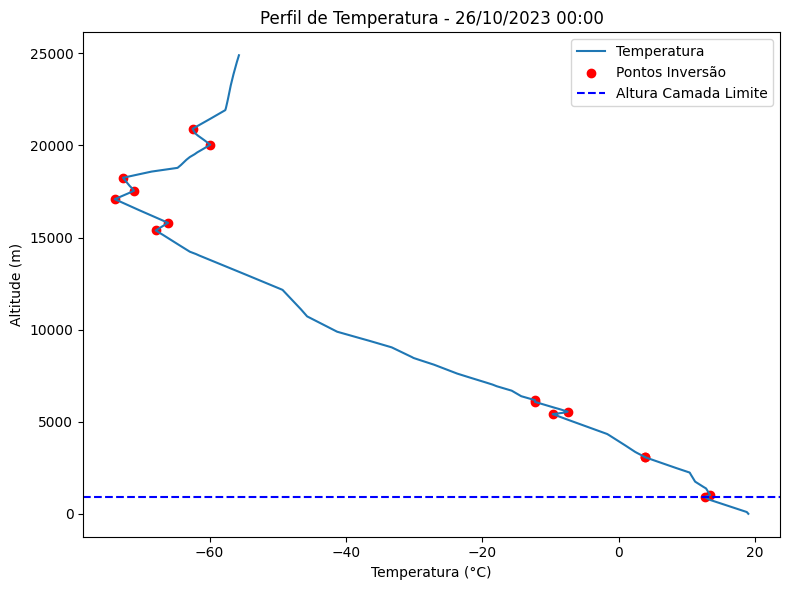

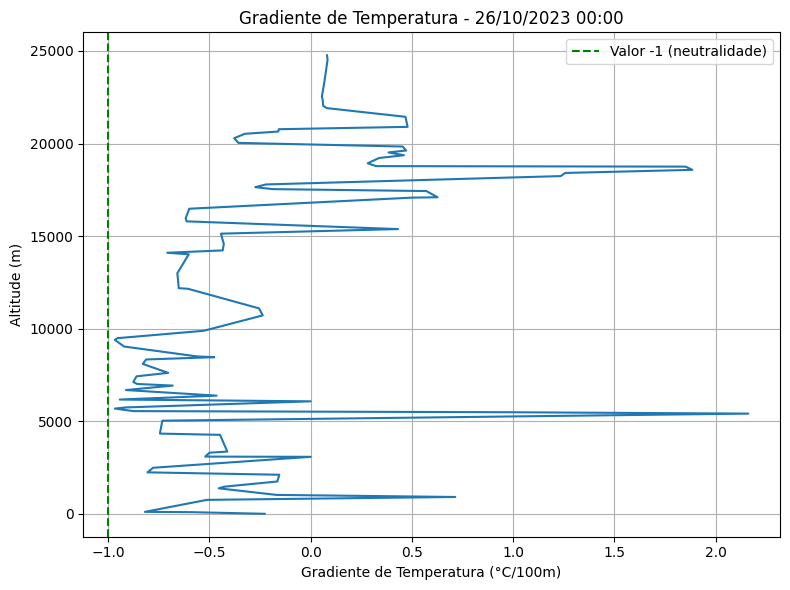

Analisando dados para 2023-11-24 00:00:00


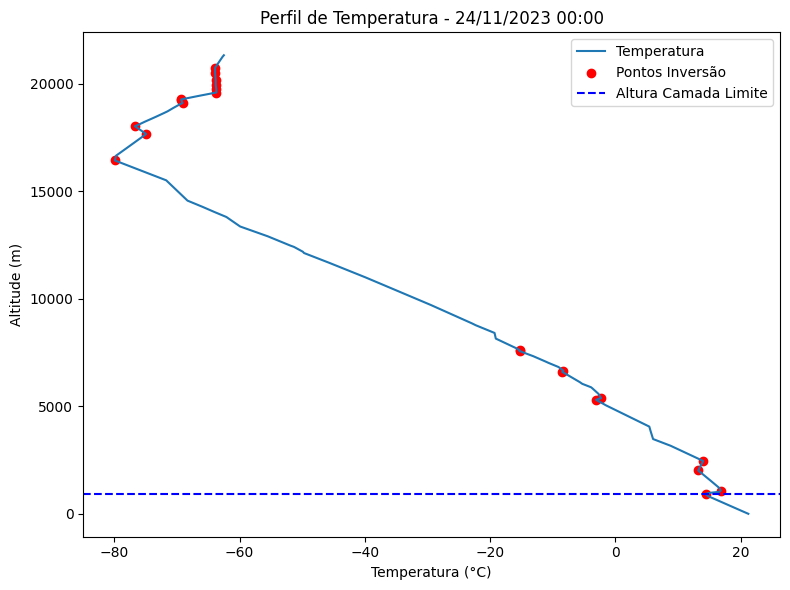

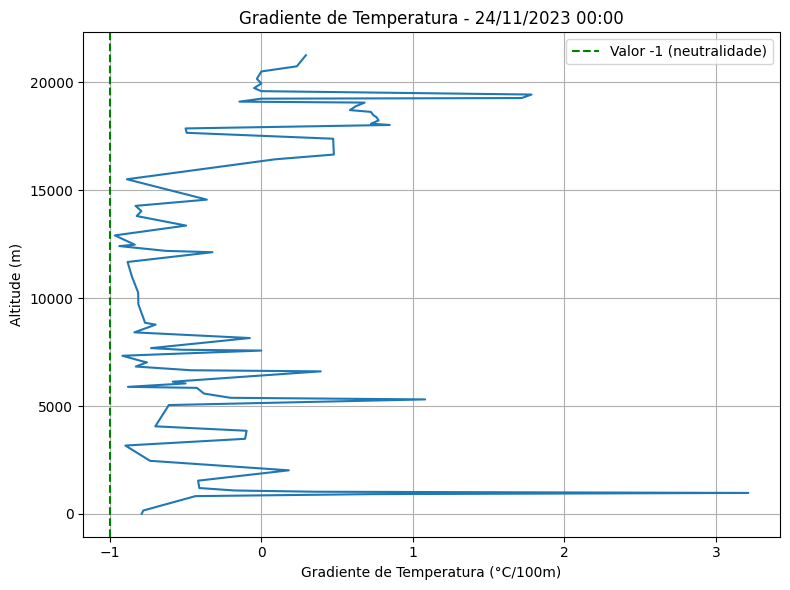

Analisando dados para 2023-11-18 00:00:00


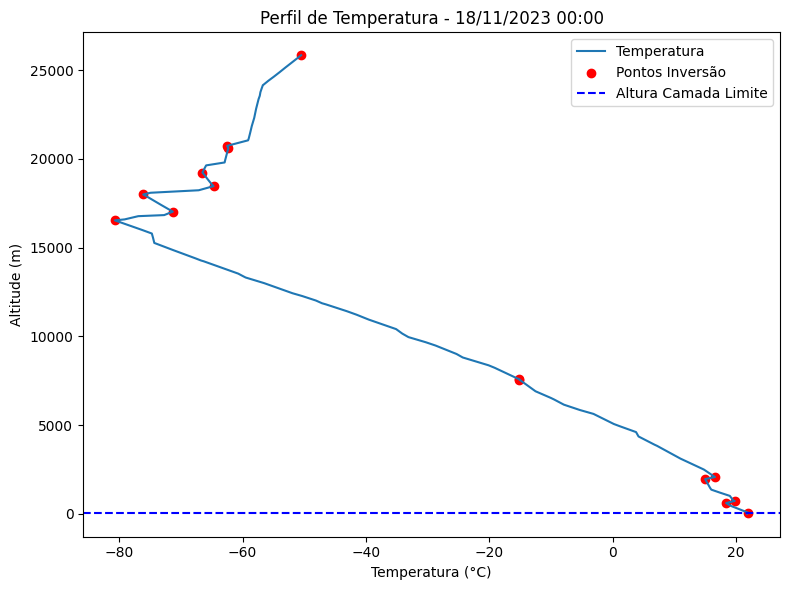

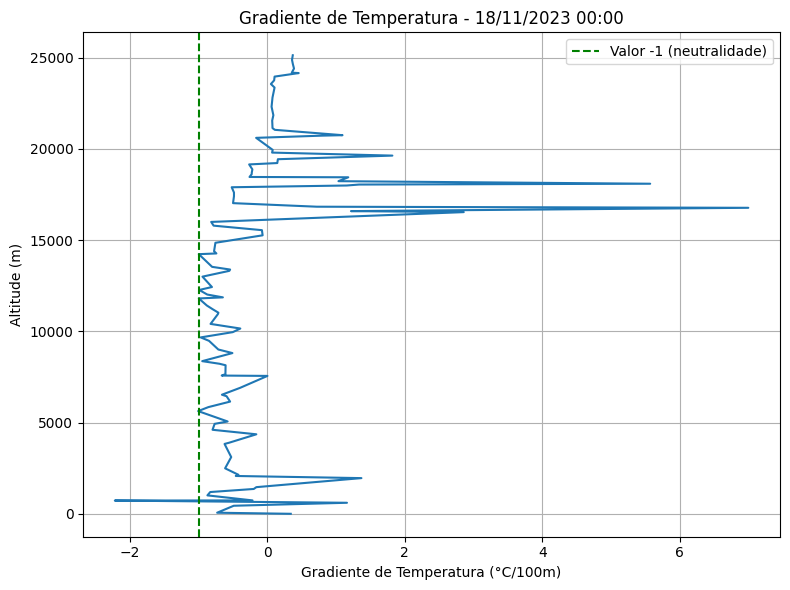

Analisando dados para 2023-12-29 00:00:00


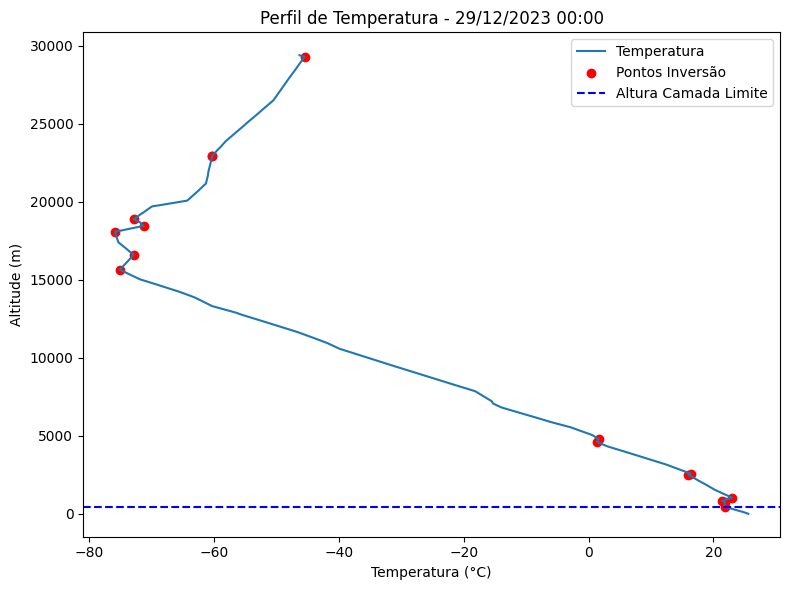

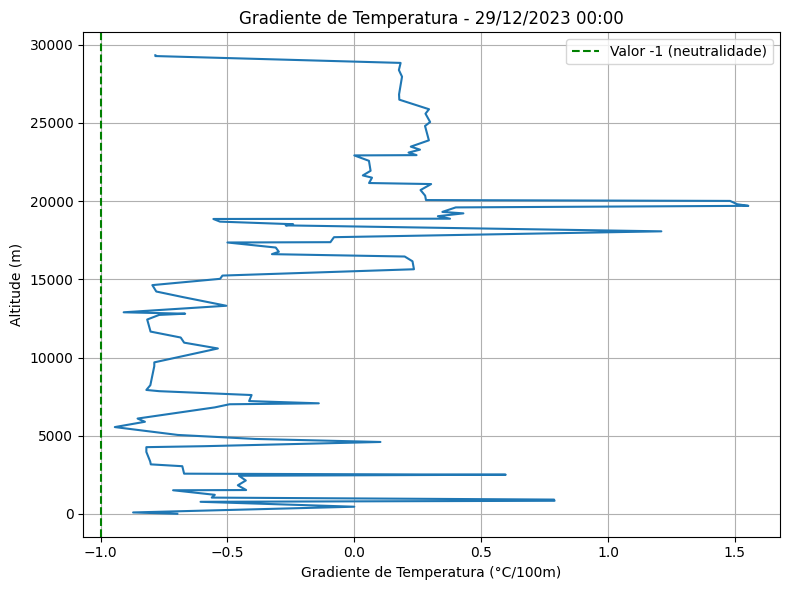

Analisando dados para 2023-08-09 00:00:00


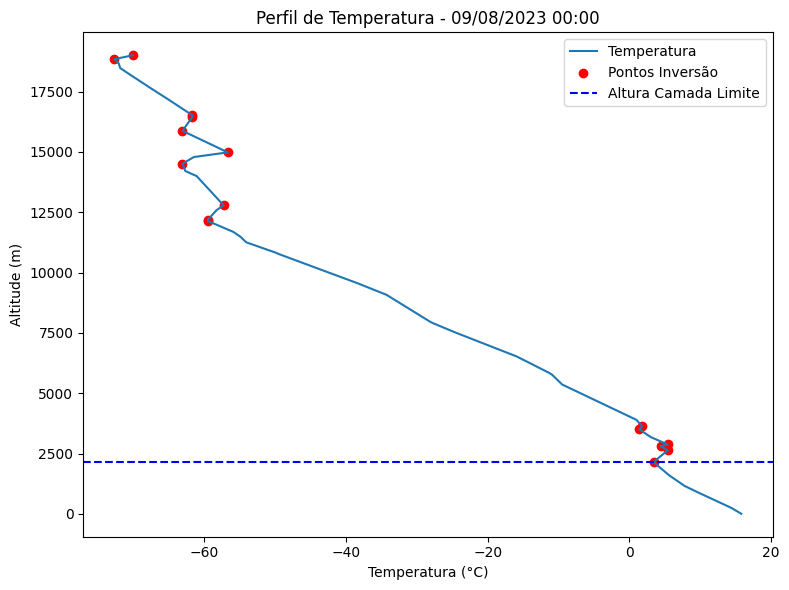

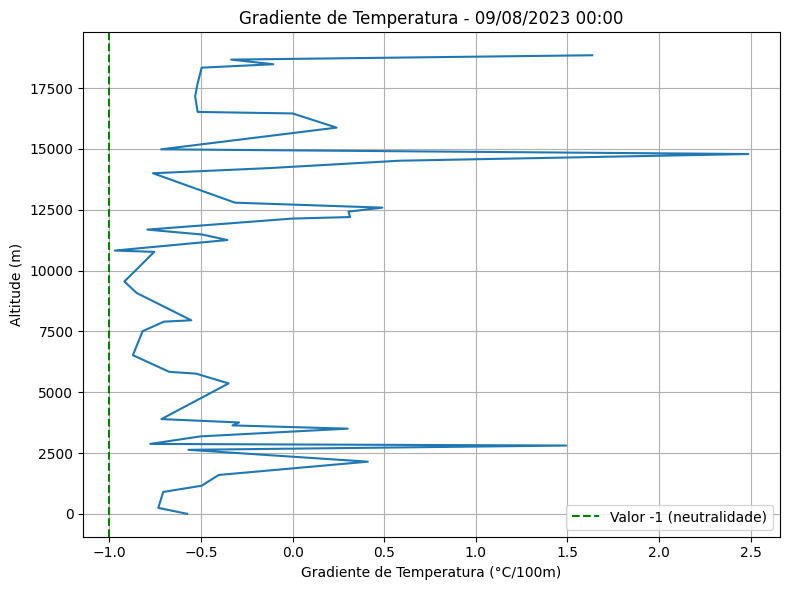

In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
import random

def plot_temperature_profile(date, station):
    try:
        df = WyomingUpperAir.request_data(date, station)
        
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        temp = df['temperature'].values
        alt = df['height'].values
        
        if len(temp) < 3 or len(alt) < 3:
            print(f"Dados insuficientes para a data {date}")
            return
        
        pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
        altura_camada_limite = alt[pontos_inversao[0]] if len(pontos_inversao) > 0 else None
        
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(temp, alt, label='Temperatura')
        if len(pontos_inversao) > 0:
            ax.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos Inversão')
        if altura_camada_limite:
            ax.axhline(y=altura_camada_limite, color='blue', linestyle='--', label='Altura Camada Limite')
        ax.set_xlabel('Temperatura (°C)')
        ax.set_ylabel('Altitude (m)')
        ax.set_title(f'Perfil de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        ax.legend()

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro {date}: {e}")

def plot_temperature_gradient(date, station):
    try:
        df = WyomingUpperAir.request_data(date, station)
        
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        deltaT = np.diff(df['temperature'])
        deltaZ = np.diff(df['height'])
        dTdZ = (deltaT / deltaZ) * 100

        plt.figure(figsize=(8, 6))
        plt.plot(dTdZ, df['height'][:-1])
        plt.axvline(x=-1, color='green', linestyle='--', label='Valor -1 (neutralidade)')
        plt.xlabel('Gradiente de Temperatura (°C/100m)')
        plt.ylabel('Altitude (m)')
        plt.title(f'Gradiente de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

def generate_random_days_with_data(start_date, end_date, num_days, station):
    available_days = []
    while len(available_days) < num_days:
        random_day = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        try:
            df = WyomingUpperAir.request_data(random_day, station)
            if not df.empty and 'temperature' in df.columns and 'height' in df.columns:
                available_days.append(random_day)
        except:
            continue
    return available_days

start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
station = 'SBFL'
random_days_with_data = generate_random_days_with_data(start_date, end_date, 5, station)

for date in random_days_with_data:
    print(f"Analisando dados para {date}")
    plot_temperature_profile(date, station)
    plot_temperature_gradient(date, station)


Analisando dados para 2023-09-13 00:00:00


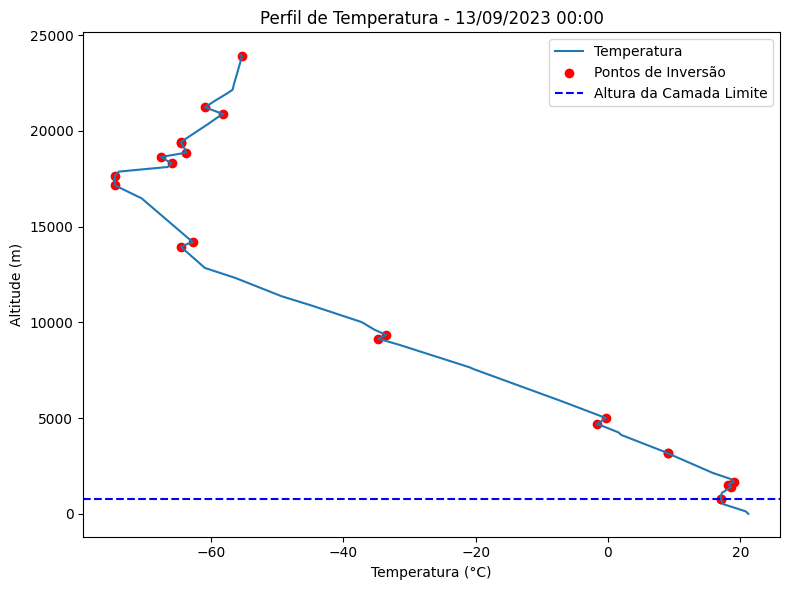

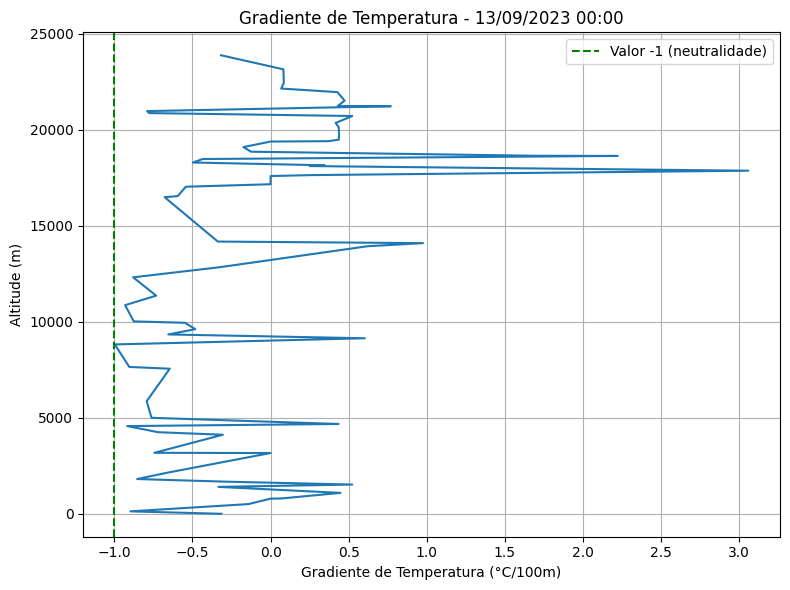

Analisando dados para 2023-08-25 00:00:00


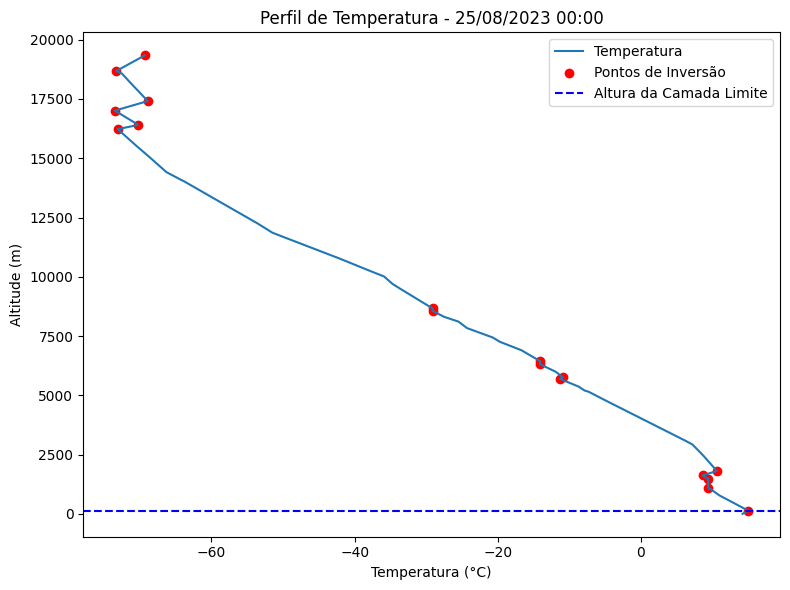

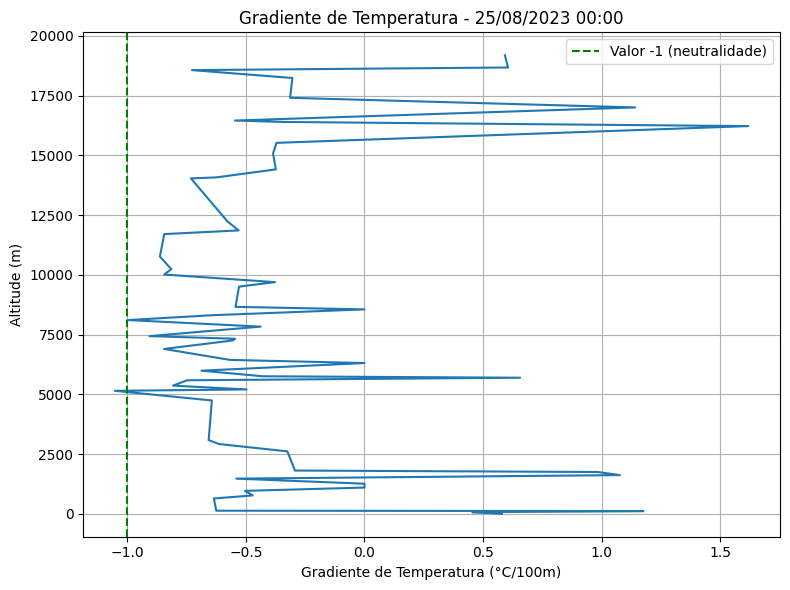

Analisando dados para 2023-07-21 00:00:00


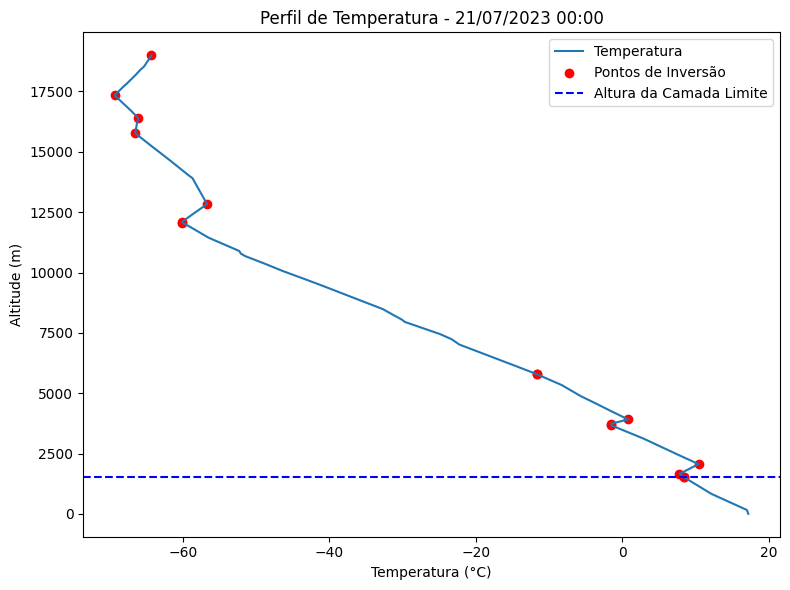

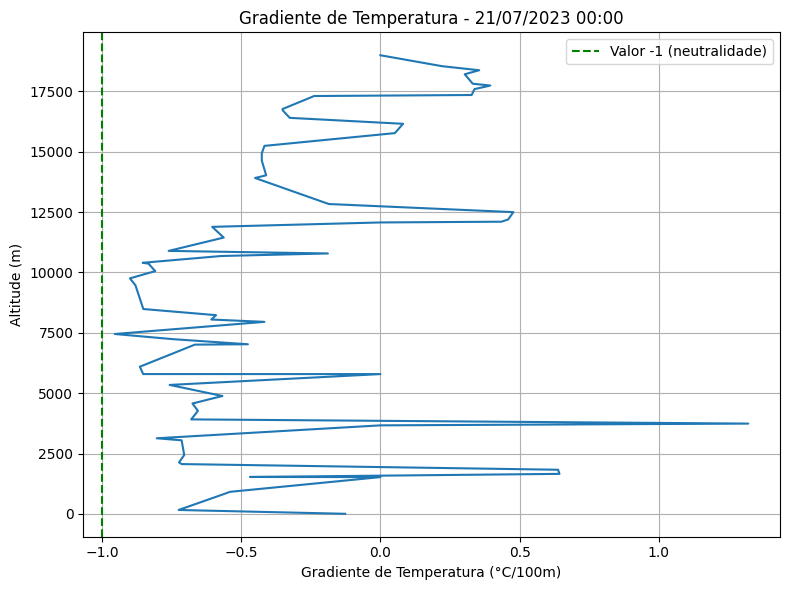

Analisando dados para 2023-09-06 00:00:00


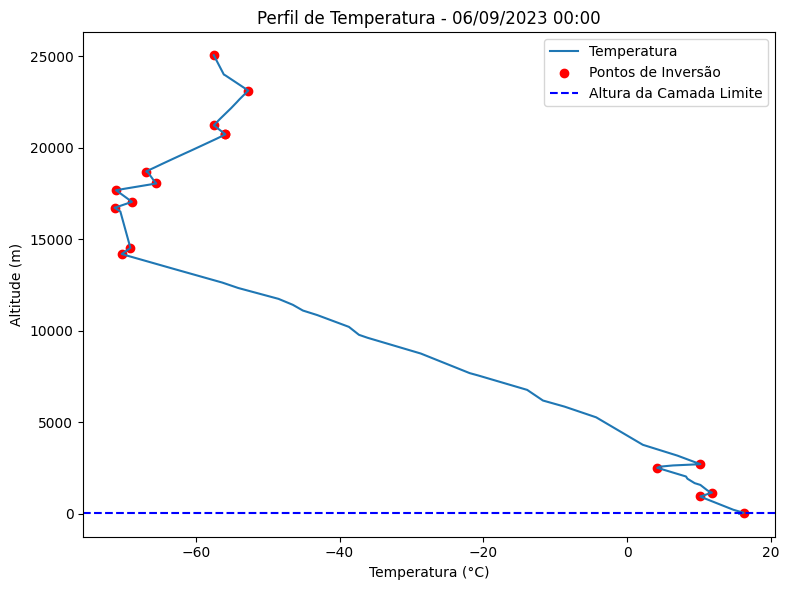

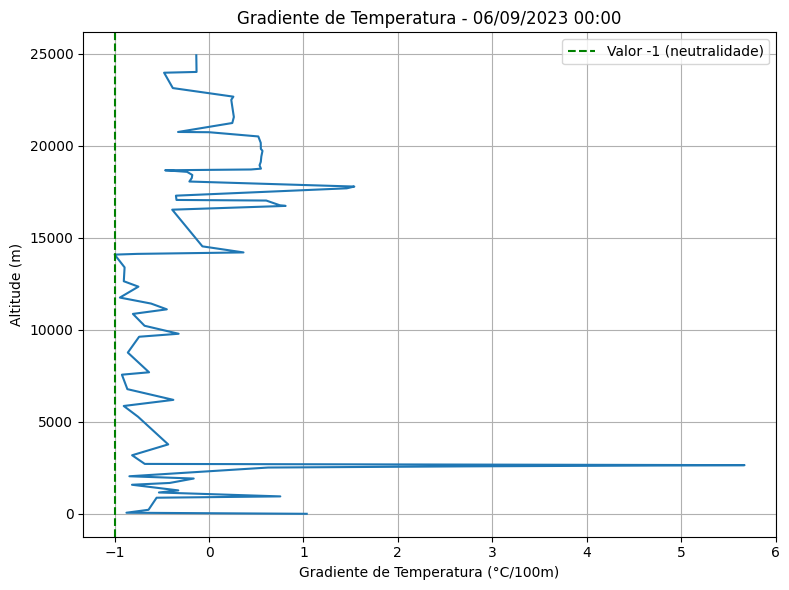

Analisando dados para 2023-06-29 00:00:00


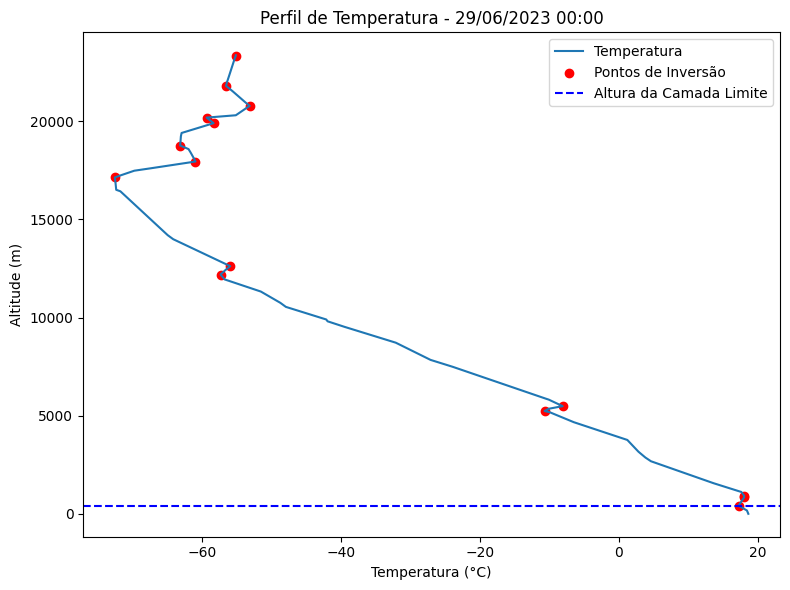

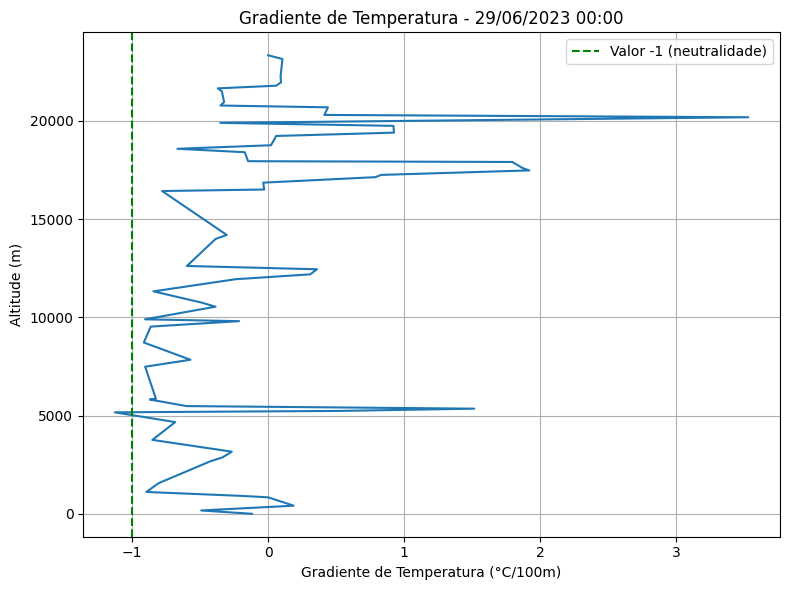

In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
import random

def plot_temperature_profile(date, station):
    try:
        df = WyomingUpperAir.request_data(date, station)
        
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        temp = df['temperature'].values
        alt = df['height'].values
        
        if len(temp) < 3 or len(alt) < 3:
            print(f"Dados insuficientes para a data {date}")
            return
        
        pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
        altura_camada_limite = alt[pontos_inversao[0]] if len(pontos_inversao) > 0 else None
        
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(temp, alt, label='Temperatura')
        ax.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
        if altura_camada_limite:
            ax.axhline(y=altura_camada_limite, color='blue', linestyle='--', label='Altura da Camada Limite')
        ax.set_xlabel('Temperatura (°C)')
        ax.set_ylabel('Altitude (m)')
        ax.set_title(f'Perfil de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        ax.legend()

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

def plot_temperature_gradient(date, station):
    try:
        df = WyomingUpperAir.request_data(date, station)
        
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        deltaT = np.diff(df['temperature'])
        deltaZ = np.diff(df['height'])
        dTdZ = (deltaT / deltaZ) * 100

        plt.figure(figsize=(8, 6))
        plt.plot(dTdZ, df['height'][:-1])
        plt.axvline(x=-1, color='green', linestyle='--', label='Valor -1 (neutralidade)')
        plt.xlabel('Gradiente de Temperatura (°C/100m)')
        plt.ylabel('Altitude (m)')
        plt.title(f'Gradiente de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

def generate_random_days(start_date, end_date, num_days):
    total_days = (end_date - start_date).days
    random_days = random.sample(range(total_days), num_days)
    return [start_date + timedelta(days=day_offset) for day_offset in random_days]

start_date_inverno = datetime(2023, 6, 21)
end_date_inverno = datetime(2023, 9, 23) 
station = 'SBFL'
random_days = generate_random_days(start_date_inverno, end_date_inverno, 5)

for date in random_days:
    print(f"Analisando dados para {date}")
    plot_temperature_profile(date, station)
    plot_temperature_gradient(date, station)


## Etapa 3

In [4]:
import pandas as pd

# Caminho completo do arquivo AERMET
file_path = r'C:\Users\Ana Carolina\Documents\GitHub\ENS410064\Atv 2\AERMET.xlsx'

# Lendo a planilha AERMET
df = pd.read_excel(file_path)

# Selecionando as colunas desejadas e criando um novo DataFrame
selected_data = df[['Rugosidade', 'Albedo', 'Bowen']]

# Renomeando as colunas
selected_data.columns = ['Rugosidade', 'Albedo', 'Bowen']

# Mostrando os dados
print(selected_data)


      Rugosidade  Albedo  Bowen
0         0.9824     1.0   0.48
1         1.0000     1.0   0.48
2         1.0000     1.0   0.48
3         1.0000     1.0   0.48
4         1.0000     1.0   0.48
...          ...     ...    ...
8779     -9.0000    -9.0  -9.00
8780     -9.0000    -9.0  -9.00
8781     -9.0000    -9.0  -9.00
8782     -9.0000    -9.0  -9.00
8783     -9.0000    -9.0  -9.00

[8784 rows x 3 columns]
